In [1]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 22
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42

COLORS = {
    # rounds
    "resnet_raking_rounds_4": "tab:purple",
    # batches
    "resnet_default_batch_128": "black",
    "resnet_raking_batch_128": "tab:green",
    "resnet_default_batch_32": "mediumslateblue",
    "resnet_raking_batch_32": "chocolate",
    "resnet_default_batch_512": "tab:blue",
    "resnet_raking_batch_512":  "orangered",
    "fmnist_default_batch_128": "black",
    "fmnist_raking_batch_128": "tab:green",
    # bins
    "resnet_raking_bins_25": "black",
    "resnet_raking_bins_100": "deeppink",
    "resnet_raking_bins_200": "tab:blue",
    # factor
    "resnet_default_factor_5": "tab:blue",
    "resnet_raking_factor_5": "orangered",
    "resnet_default_factor_10": "tab:blue",
    "resnet_raking_factor_10": "orangered",
    "fmnist_default_factor_5": "tab:blue",
    "fmnist_raking_factor_5": "orangered",
    "fmnist_default_factor_10": "tab:blue",
    "fmnist_raking_factor_10": "orangered",
     "fmnist_default_factor_100": "tab:blue",
    "fmnist_raking_factor_100": "orangered",
}

In [19]:
def create_plot(exp_names, seed=0, res_dir = "../logs/resnet", steps=list(range(200, 3001, 200)), title="Fashion MNIST", filename=None):
    losses = {name: {"train_loss": [], "validation_loss": [], "train_accuracy": [], "validation_accuracy": []} for name in exp_names}
    for name in exp_names:
        for i in steps:
            with open(os.path.join(res_dir, f'{name}/{seed}/step_{i}.json'), "r") as f:
                res = json.load(f)
                for key in res:
                    losses[name][key].append(res[key])

    sns.set_style("whitegrid")

    fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharey="row")

    for name in exp_names:
        x = steps

        y = np.array(losses[name]['train_loss'])
        ax[0, 0].plot(x, y, label=exp_names[name], color=COLORS[name])
        ax[0, 0].set_ylabel('Train Loss')
        ax[0, 0].set_yscale("log")

        y = np.array(losses[name]['validation_loss'])
        ax[0, 1].plot(x, y, label=exp_names[name], color=COLORS[name])
        ax[0, 1].set_ylabel('Validation Loss')
        ax[0, 1].set_yscale("log")

        y = np.array(losses[name]['train_accuracy'])
        ax[1, 0].plot(x, y, label=exp_names[name], color=COLORS[name])
        ax[1, 0].set_ylabel('Train Accuracy')
        ax[1, 0].set_xlabel('Training Iterations')

        y = np.array(losses[name]['validation_accuracy'])
        ax[1, 1].plot(x, y, label=exp_names[name], color=COLORS[name])
        ax[1, 1].set_ylabel('Validation Accuracy')
        ax[1, 1].set_xlabel('Training Iterations')

    ax[1, 1].legend()
    fig.suptitle(f"{title} Classification Performance", fontsize=20, y=0.95)
    if filename:
        plt.savefig(f"figures/{filename}", bbox_inches='tight')
    plt.show()

### CIFAR-10

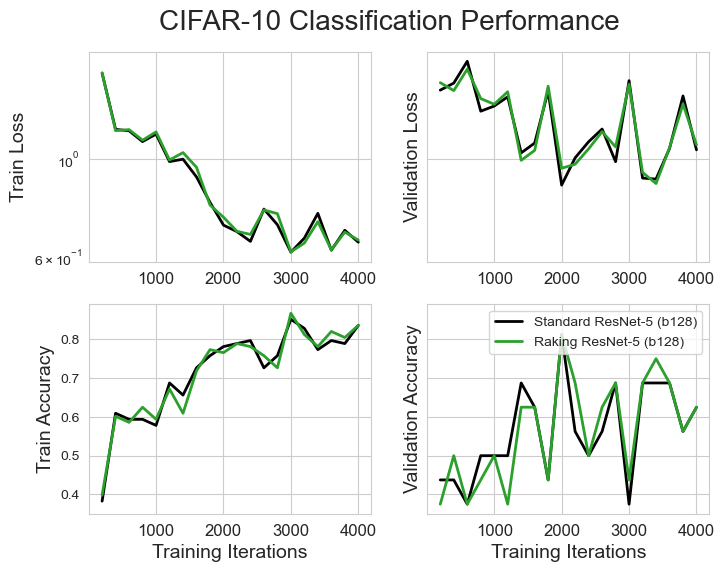

In [42]:
exp_names = {
    "resnet_default_batch_128": "Standard ResNet-5 (b128)",
    "resnet_raking_batch_128":  "Raking ResNet-5 (b128)"
}
steps = list(range(200, 4001, 200))


create_plot(exp_names, title="CIFAR-10", steps=steps, filename="cifar10_b128.pdf")

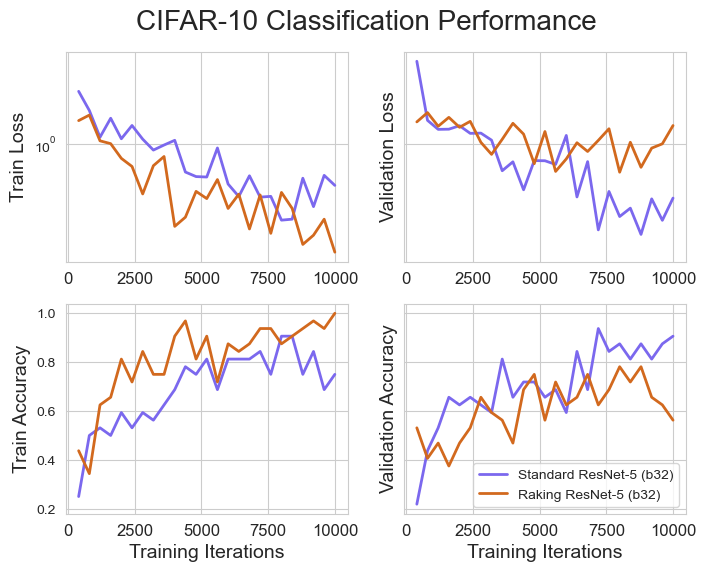

In [43]:
exp_names = {
    "resnet_default_batch_32": "Standard ResNet-5 (b32)",
    "resnet_raking_batch_32":  "Raking ResNet-5 (b32)"
}
steps = list(range(400, 10001, 400))


create_plot(exp_names, title="CIFAR-10", steps=steps, filename="cifar10_b32.pdf")

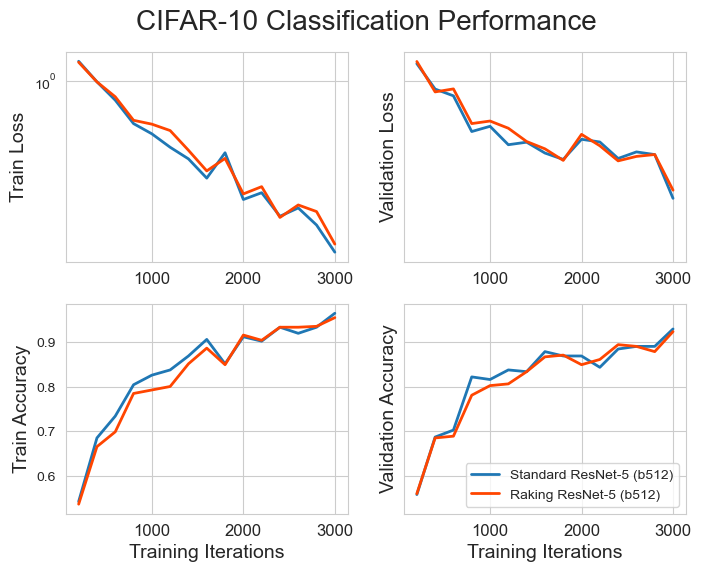

In [28]:
exp_names = {
    "resnet_default_batch_512": "Standard ResNet-5 (b512)",
    "resnet_raking_batch_512":  "Raking ResNet-5 (b512)"
}
steps = list(range(200, 3001, 200))


create_plot(exp_names, title="CIFAR-10", steps=steps, filename="cifar10_b512.pdf")

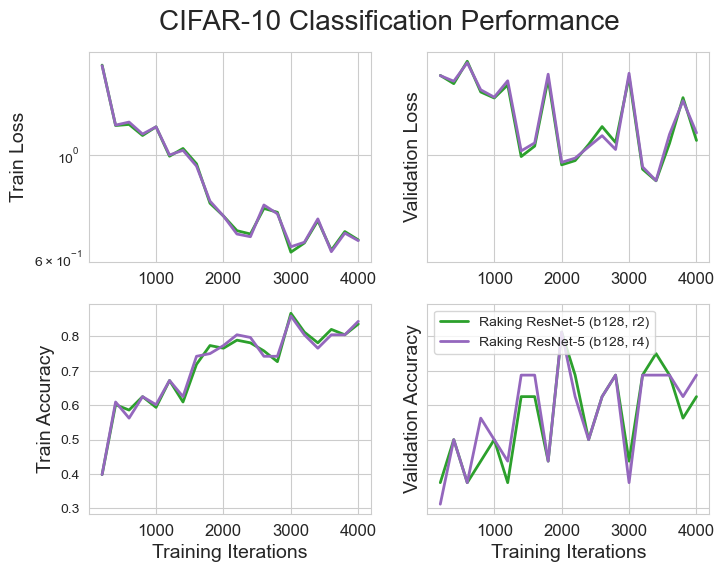

In [41]:
exp_names = {
    "resnet_raking_batch_128": "Raking ResNet-5 (b128, r2)",
    "resnet_raking_rounds_4":  "Raking ResNet-5 (b128, r4)"
}
steps = list(range(200, 4001, 200))


create_plot(exp_names, title="CIFAR-10", steps=steps, filename="cifar10_rounds.pdf")

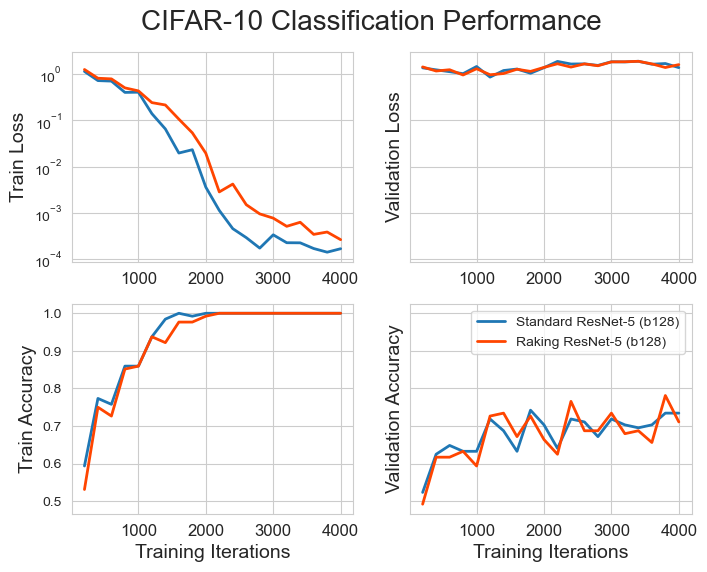

In [13]:
exp_names = {
    "resnet_default_factor_10": "Standard ResNet-5 (b128)",
    "resnet_raking_factor_10":  "Raking ResNet-5 (b128)"
}
steps = list(range(200, 4001, 200))


create_plot(exp_names, title="CIFAR-10", steps=steps)

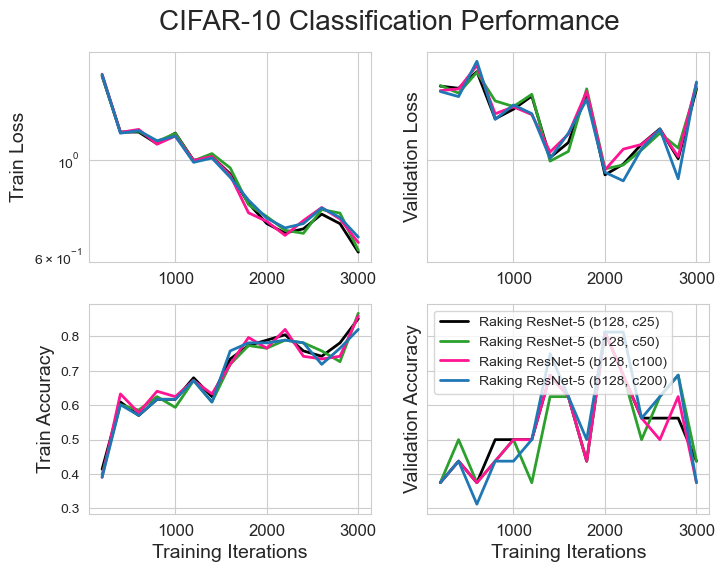

In [40]:
exp_names = {
    "resnet_raking_bins_25":  "Raking ResNet-5 (b128, c25)",
    "resnet_raking_batch_128":  "Raking ResNet-5 (b128, c50)",
    "resnet_raking_bins_100":  "Raking ResNet-5 (b128, c100)",
    "resnet_raking_bins_200":  "Raking ResNet-5 (b128, c200)",
}
steps = list(range(200, 3001, 200))


create_plot(exp_names, title="CIFAR-10", steps=steps, filename="cifar10_bins.pdf")

### FashionMNIST

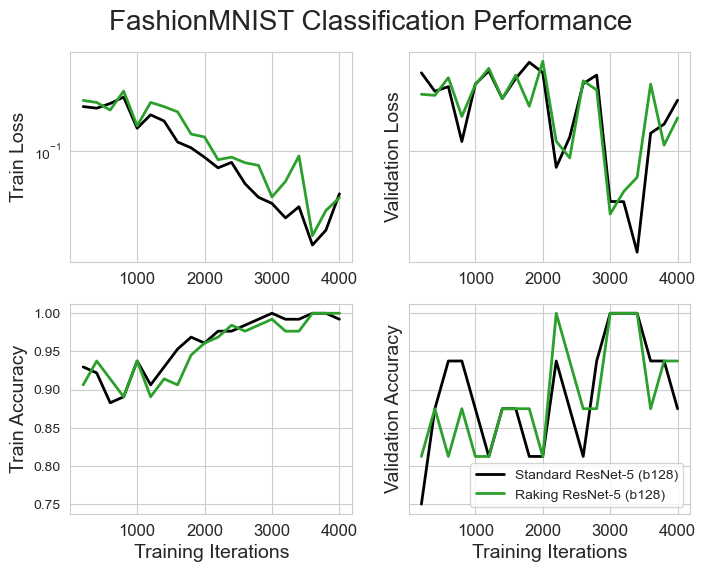

In [21]:
exp_names = {
    "fmnist_default_batch_128": "Standard ResNet-5 (b128)",
    "fmnist_raking_batch_128":  "Raking ResNet-5 (b128)"
}
steps = list(range(200, 4001, 200))


create_plot(exp_names, title="FashionMNIST", steps=steps, filename="fmnist_b128.pdf")

In [5]:
# exp_names = {
#     "resnet_raking_batch_128": "Raking ResNet-5 (b128, 2 rounds)",
#     "resnet_raking_rounds_4":  "Raking ResNet-5 (b128, 4 rounds)",
#     "resnet_raking_rounds_6":  "Raking ResNet-5 (b128, 6 rounds)"
# }

# create_plot(exp_names)

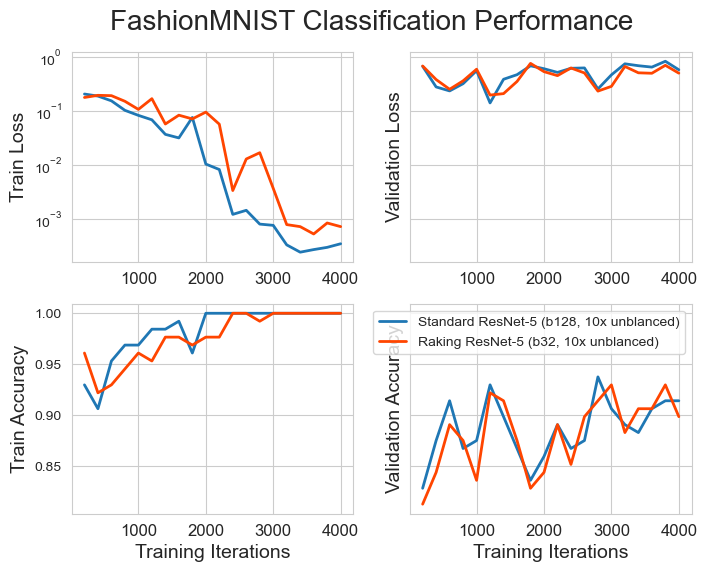

In [24]:
exp_names = {
    "fmnist_default_factor_10": "Standard ResNet-5 (b128, 10x unblanced)",
    "fmnist_raking_factor_10":  "Raking ResNet-5 (b32, 10x unblanced)"
}
steps = list(range(200, 4001, 200))

create_plot(exp_names, steps=steps, title="FashionMNIST", filename="fmnist_factor_10.pdf")

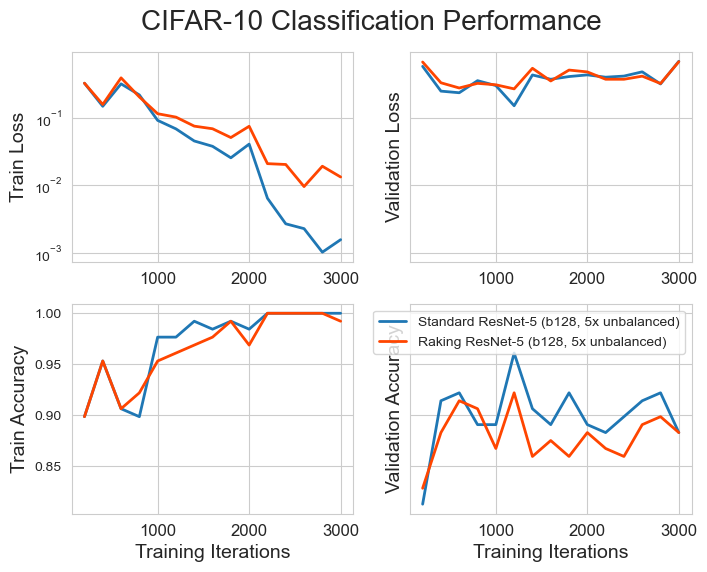

In [11]:
exp_names = {
    "fmnist_default_factor_5":  "Standard ResNet-5 (b128, 5x unbalanced)",
    "fmnist_raking_factor_5": "Raking ResNet-5 (b128, 5x unbalanced)",
}

create_plot(exp_names, title="FashionMNIST")

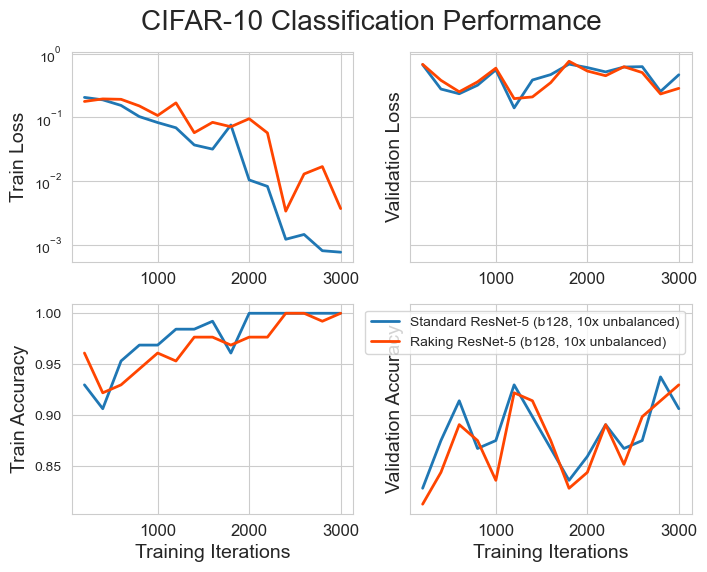

In [12]:
exp_names = {
    "fmnist_default_factor_10":  "Standard ResNet-5 (b128, 10x unbalanced)",
    "fmnist_raking_factor_10": "Raking ResNet-5 (b128, 10x unbalanced)",
}

create_plot(exp_names, title="FashionMNIST")

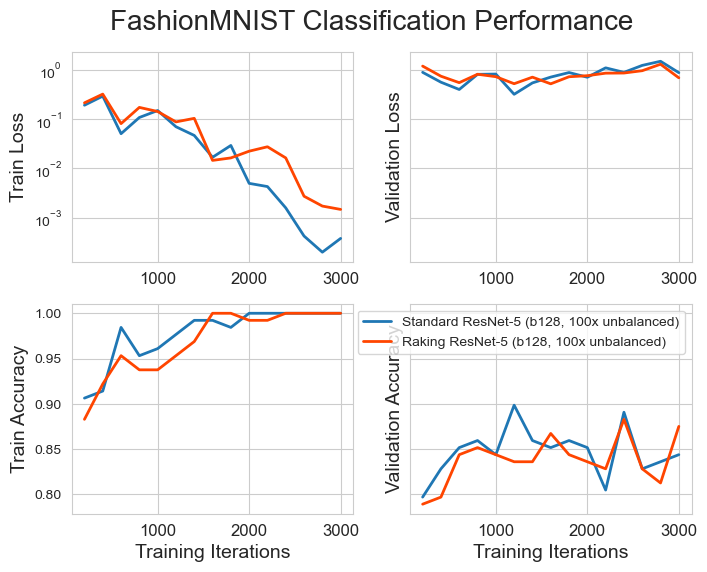

In [18]:
exp_names = {
    "fmnist_default_factor_100":  "Standard ResNet-5 (b128, 100x unbalanced)",
    "fmnist_raking_factor_100": "Raking ResNet-5 (b128, 100x unbalanced)",
}

create_plot(exp_names, title="FashionMNIST")

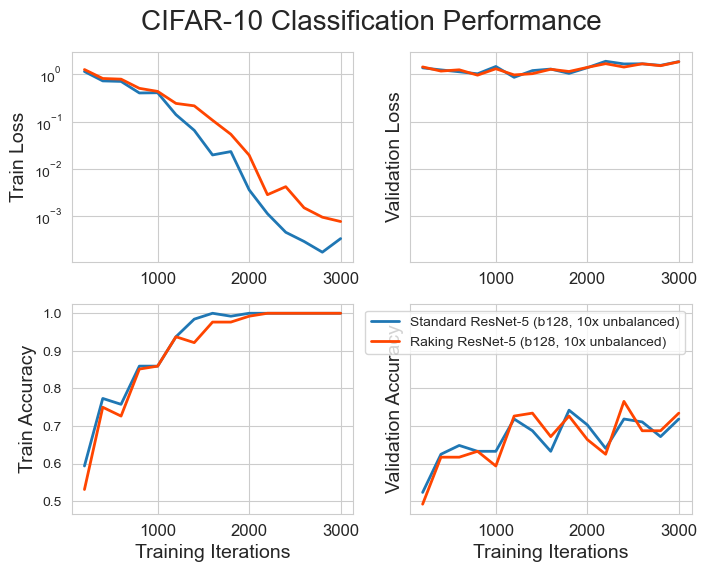

In [13]:
exp_names = {
    "resnet_default_factor_10":  "Standard ResNet-5 (b128, 10x unbalanced)",
    "resnet_raking_factor_10": "Raking ResNet-5 (b128, 10x unbalanced)",
}

create_plot(exp_names)